In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import pylab
import math 

from scipy import stats 

import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [21]:
#loading data 
econ_df = pd.read_excel('/Users/samys/Desktop/xtra/PolyQuant/korea_data.xlsx')
econ_df = econ_df.replace("..", "nan")

#setting index to year column 
econ_df.index = econ_df['Year']
econ_df = econ_df.drop('Year', axis = 1)

#setting data type of dataframe 
econ_df = econ_df.astype(float)
econ_df = econ_df.loc['1969': '2016']

#shortening the names
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

# renaming columns
econ_df = econ_df.rename(columns = column_names)

# checking for nulls
display('-'*100)
display(econ_df.isnull().any())

# displaying the first five rows
display('-'*100)
display(econ_df.head())

'----------------------------------------------------------------------------------------------------'

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

'----------------------------------------------------------------------------------------------------'

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<Axes: >

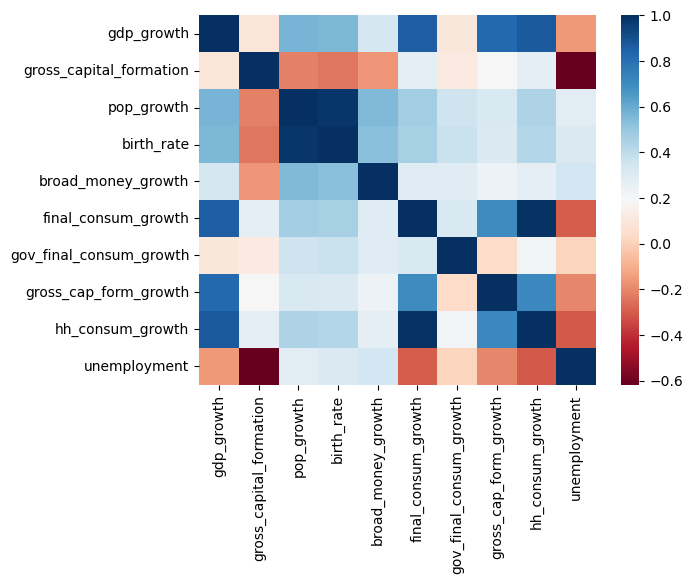

In [22]:
#printing out correlation matrix of dataframe 
corr = econ_df.corr()

#displaying 
display(corr)

#plotting heatmap 
#basically helps us identify correlation, looking for very dark blue or very dark red
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap = "RdBu")


#we are looking for very high correlations, e.g. birthrate 0.978754 they are basically identical 
#correlation is too high and it is not a good thing

In [23]:
#variance inflation factor
econ_df_before  = econ_df
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth', 'gross_capital_formation'], axis = 1)

X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)

#creating series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range (X1.shape[1])], index = X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range (X2.shape[1])], index = X2.columns)

#displaying series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

#general rule, Above 5 drop it

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      29.930686
gdp_growth                  9.366468
pop_growth                  2.636300
broad_money_growth          1.604662
gov_final_consum_growth     1.361763
gross_cap_form_growth       3.553567
hh_consum_growth            5.114816
unemployment                1.588427
dtype: float64

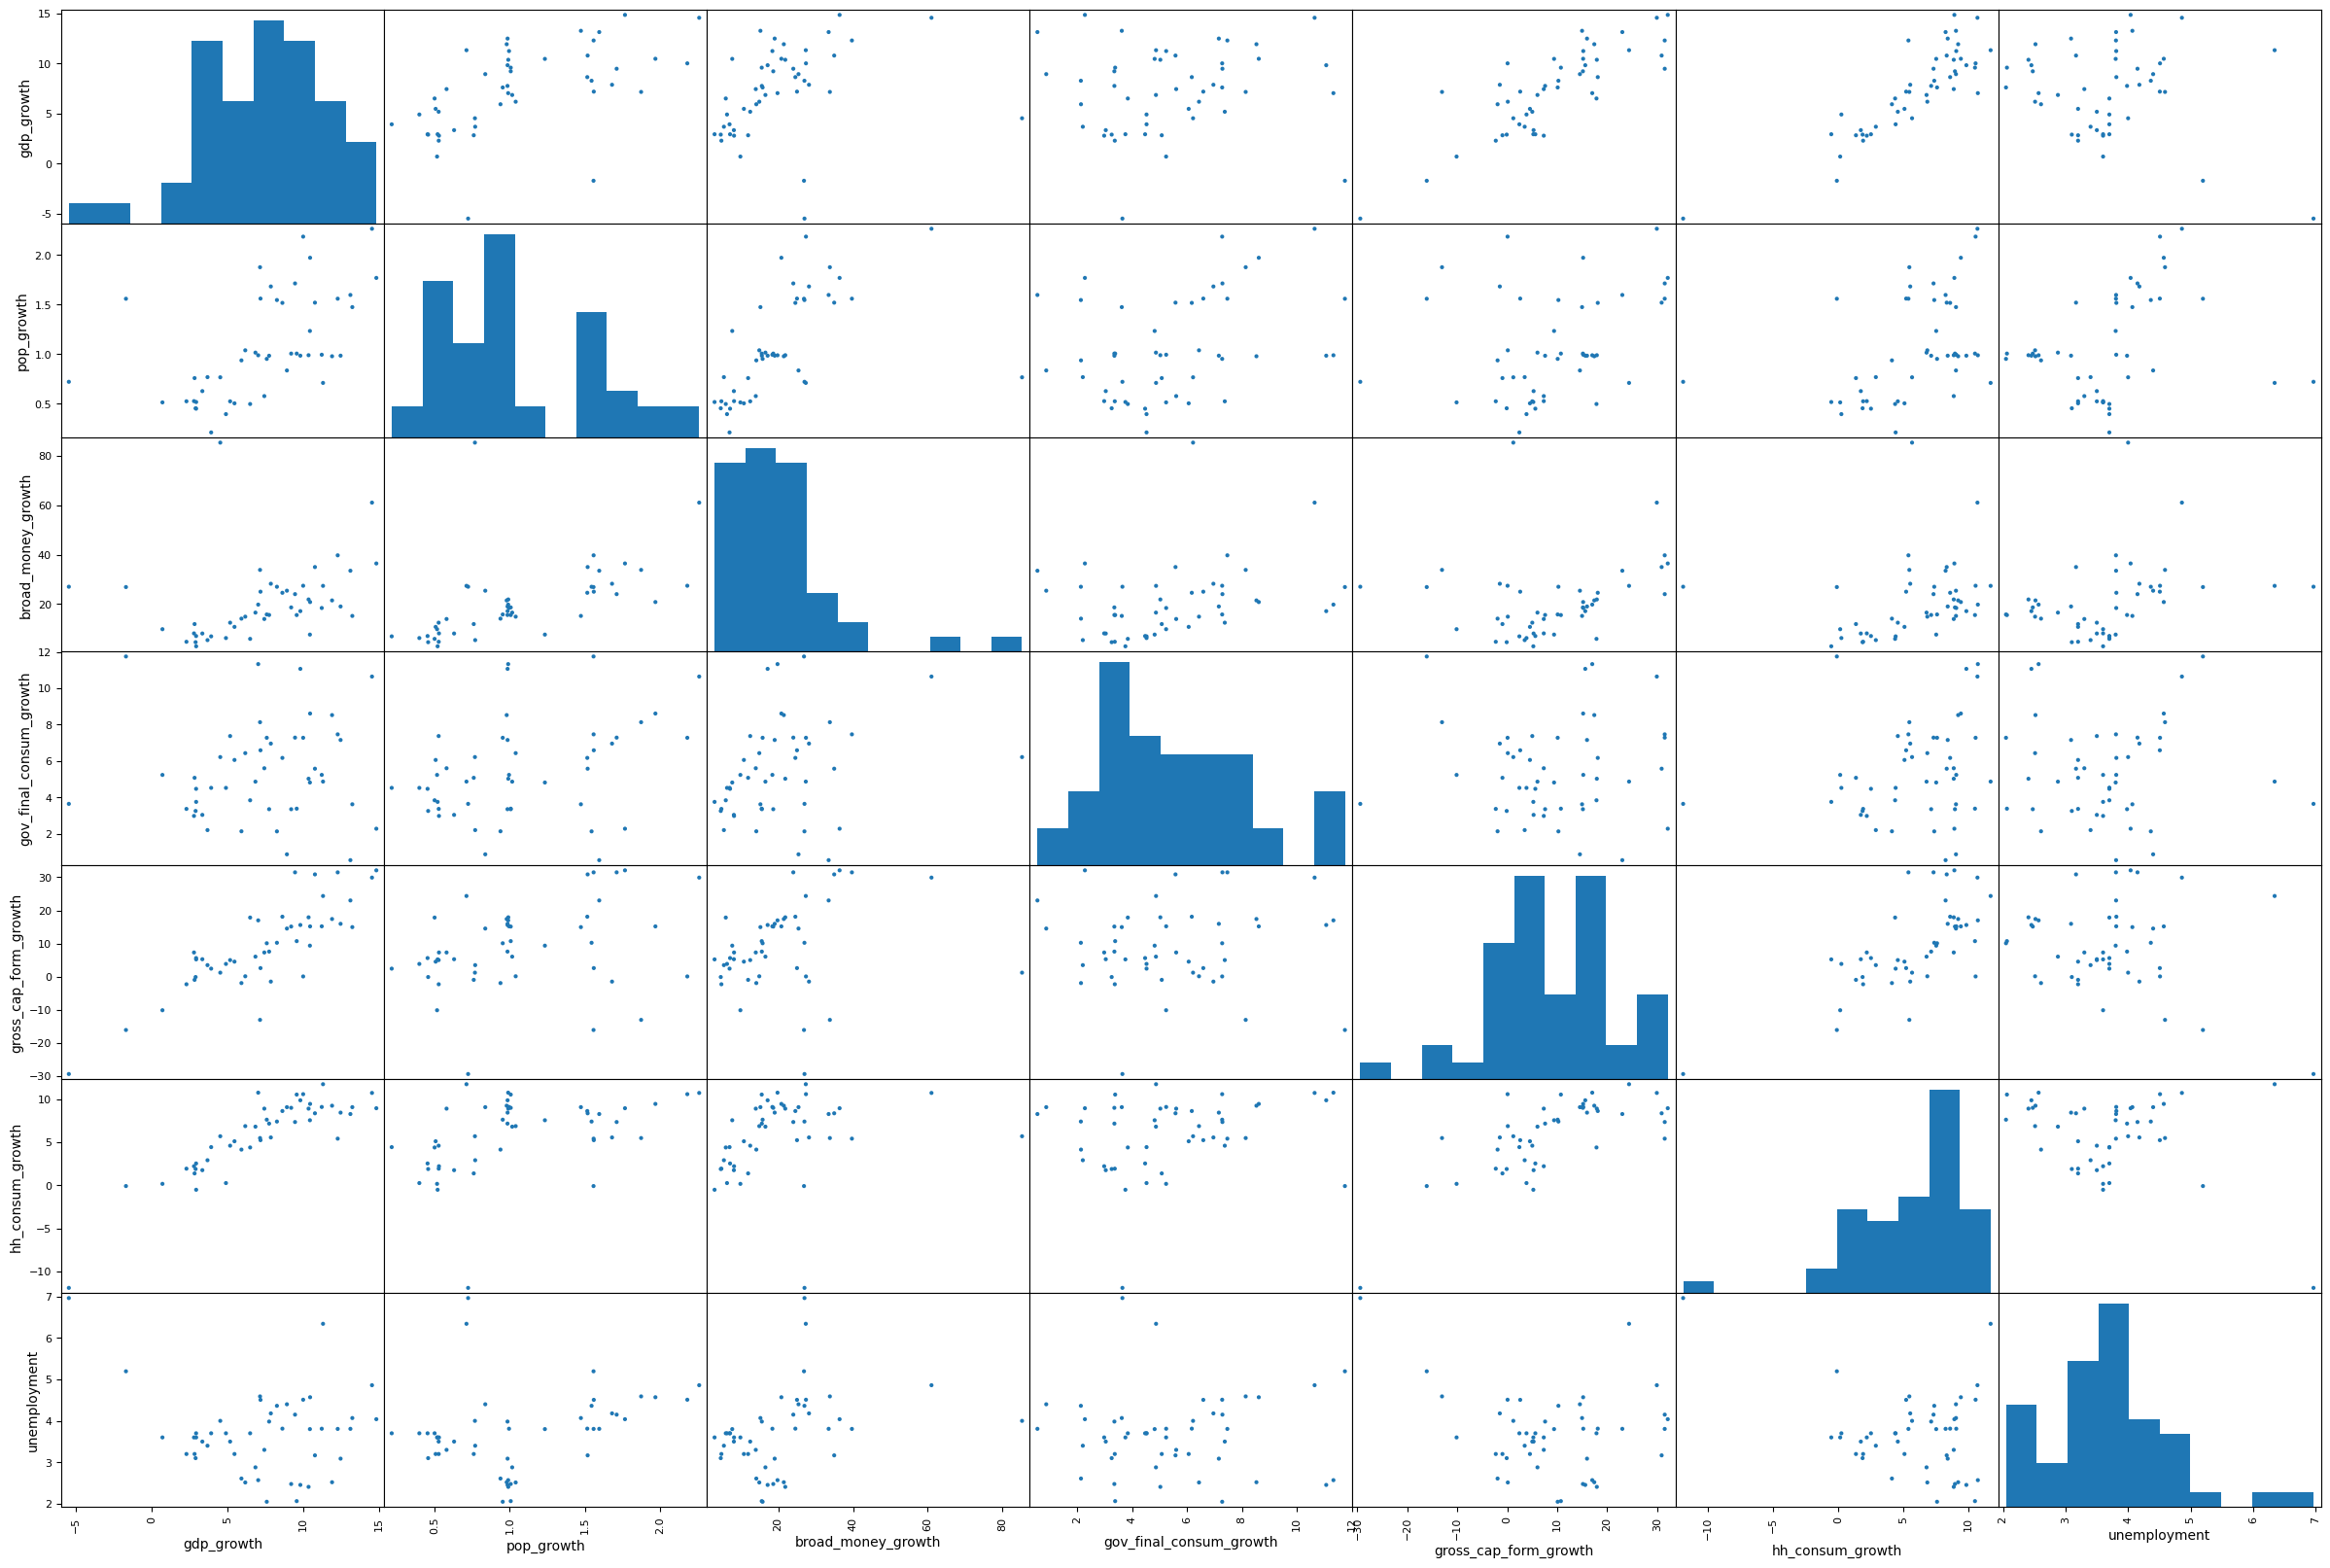

In [24]:
#defining scatter plot 
pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30,20))

#showing plot
plt.show()

In [25]:
#getting summary
desc_df = econ_df.describe()

#standard deviation metric 
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['+3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [26]:
#filtering the outliers
#z score function is the number of standard deviations from the mean a datapoint is
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis = 1)]

#rows removed
econ_df.index.difference(econ_remove_df.index)

Index([1998, 2001], dtype='int64', name='Year')

In [27]:
#defining input and output variables
X = econ_df_after.drop('gdp_growth', axis =1)
Y = econ_df_after[['gdp_growth']]

#splitting dataset into training and testing portions
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

#creating instance of the model 
regression_model = LinearRegression()

#fitting model 
regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# grabbing intercept and the coefficient
intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 2.08
----------------------------------------------------------------------------------------------------
The Coefficient for pop_growth is 2.0
The Coefficient for broad_money_growth is -0.0017
The Coefficient for gov_final_consum_growth is -0.21
The Coefficient for gross_cap_form_growth is 0.14
The Coefficient for hh_consum_growth is 0.51
The Coefficient for unemployment is 0.027


In [29]:
#get multiple predicitons 
y_predict = regression_model.predict(X_test)

#showing first five
y_predict[:5]

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324]])

In [30]:
#defining input for evaluation
X2 = sm.add_constant(X)

#create OLS model
model = sm.OLS(Y,X2)

#fitting data 
est = model.fit()

In [32]:
#testing for heterodescity

#running whites test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print("-"*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

#running Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.43365711028668297 0.5090811918586773
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.4337
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.2518364670120116 0.2662794557853955
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2518
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


The number of lags will be 9
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1596
We fail to reject the null hypothesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


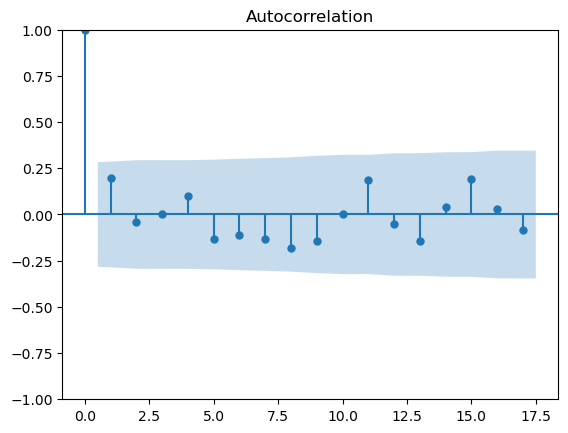

In [35]:
#testing for autocorrelation

# calculate the lag, optional
lag = min(10, (len(X) // 5))
print('The number of lags will be {}'.format(lag))
print('-' * 100)

# running Ljung-Box test for no autocorrelation of residuals
test_results = diag.acorr_ljungbox(est.resid, lags=lag)

# grabbing p-values and the test statistics
ibvalue = test_results['lb_stat'].values
p_val = test_results['lb_pvalue'].values

# printing results of the test
p_val = list(map(float, p_val))
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypothesis, so there is no autocorrelation.")
    print('-' * 100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypothesis, so there is autocorrelation.")
    print('-' * 100)

# plotting autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

-1.9236926866265474e-14

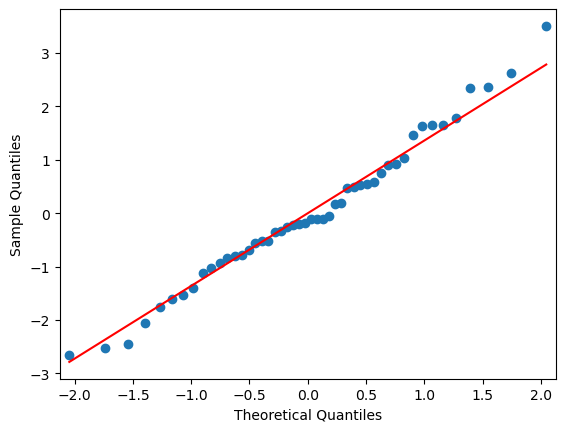

In [38]:
#checking for normality of residuals
sm.qqplot(est.resid, line ='s')
pylab.show

#checking that mean of residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

In [39]:
#calculating measures of error

import math
# calculates the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculates the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcates the root mean squared error
model_rmse =  math.sqrt(model_mse)

# displays the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.707
MAE 0.611
RMSE 0.841


In [40]:
#r-squared
model_r2 = r2_score(y_test, y_predict)
model_r2

0.8644231847567634

In [41]:
#confidence intervals 
est.conf_int

#basically saying that nothing can happen for sure and there is a chance that there can be another outcome

,0,1
const,-0.323322,4.210608
pop_growth,0.997064,3.366766
broad_money_growth,-0.037652,0.036865
gov_final_consum_growth,-0.372408,-0.005139
gross_cap_form_growth,0.079057,0.179616
hh_consum_growth,0.325648,0.667975
unemployment,-0.570237,0.558631


In [45]:
#hypothesis testing
est.pvalues

#we want lower numbers

const                      9.088069e-02
pop_growth                 5.996378e-04
broad_money_growth         9.830934e-01
gov_final_consum_growth    4.419934e-02
gross_cap_form_growth      5.978663e-06
hh_consum_growth           6.801951e-07
unemployment               9.835355e-01
dtype: float64

In [46]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     57.17
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           2.36e-18
Time:                        17:20:49   Log-Likelihood:                -82.903
No. Observations:                  48   AIC:                             179.8
Df Residuals:                      41   BIC:                             192.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
#removing insignificant variables 
# define our input variable (X) & output variable
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation','broad_money_growth',
                              'unemployment'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     89.94
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           2.61e-20
Time:                        17:22:22   Log-Likelihood:                -82.904
No. Observations:                  48   AIC:                             175.8
Df Residuals:                      43   BIC:                             185.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [50]:
#saving model for future use

import pickle

#pickle the model 
with open('my_multilinear_regression.sav' , 'wb') as f: 
    pickle.dump(regression_model,f)

#loading it back in
with open('my_multilinear_regression.sav' , 'rb') as pickle_file: 
    regression_model_2 = pickle.load(pickle_file)

#making new prediction
regression_model_2.predict([X_test.loc[2002]])

/Users/samys/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.6042968]])